In [280]:
import pandas as pd
import matplotlib.pyplot as plt


In [281]:

# Load your CSV file (adjust the path if needed)
file_path = "/home/felixl/booster/booster_gym/logs/debug_csv/reward_log_20250602_103519.csv"  # Replace with your filename
df = pd.read_csv(file_path)

# List of reward components to plot
reward_columns = [name for name in df.columns if name.startswith("reward_")]
reward_columns.remove("reward_dof_pos_limits")

# Find episode boundaries based on episode_step resetting to 1
episode_start_indices = df.index[df['episode_step'] == 1].tolist()
first_episode_start = episode_start_indices[0]
first_episode_end = episode_start_indices[1] if len(episode_start_indices) > 1 else len(df)

# Extract first episode
first_episode = df.iloc[first_episode_start:first_episode_end].copy()

# Convert columns to numeric safely
for col in reward_columns + ["body_angle", "total_reward"]:
    if col in first_episode.columns:
        first_episode[col] = pd.to_numeric(first_episode[col], errors='coerce').fillna(0)


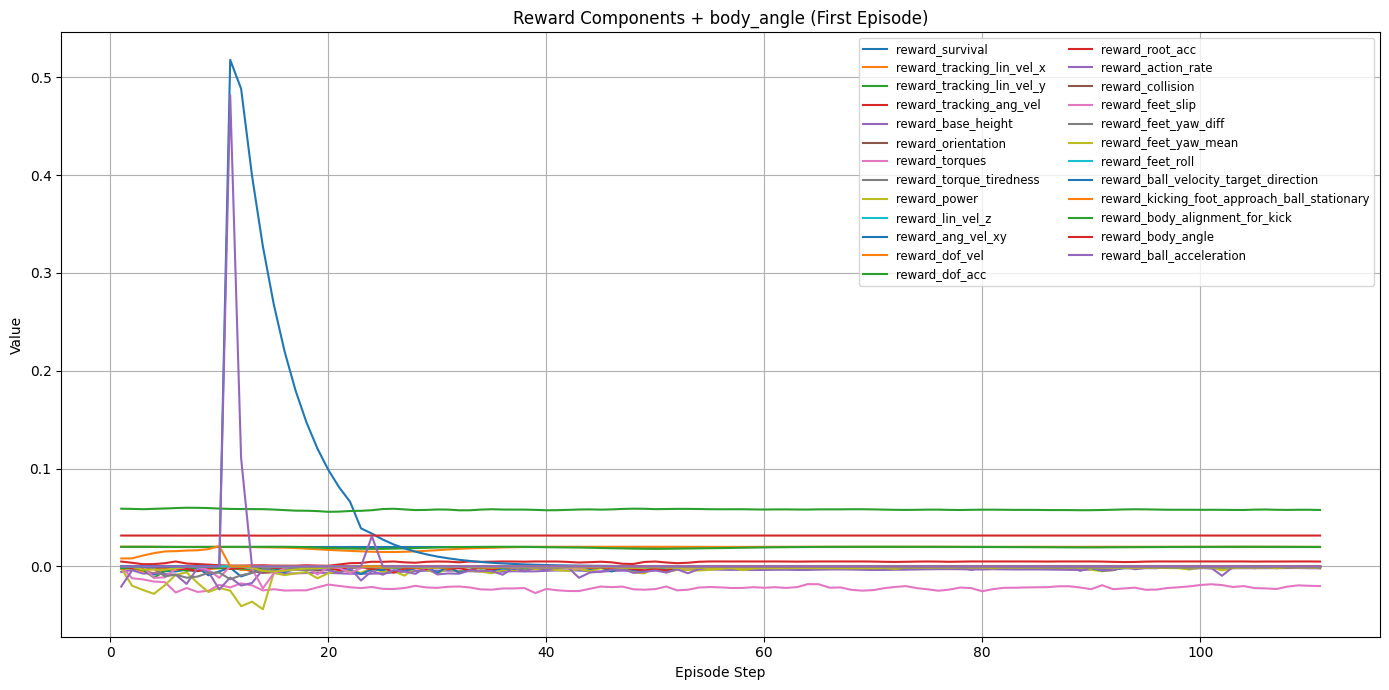

In [282]:

# === Chart 1: All reward components + body_angle ===
plt.figure(figsize=(14, 7))
for col in reward_columns:
    plt.plot(first_episode['episode_step'], first_episode[col], label=col)
if 'body_angle' in first_episode.columns:
    plt.plot(first_episode['episode_step'], first_episode['body_angle'], label='body_angle', linestyle='--', linewidth=2)
plt.title("Reward Components + body_angle (First Episode)")
plt.xlabel("Episode Step")
plt.ylabel("Value")
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


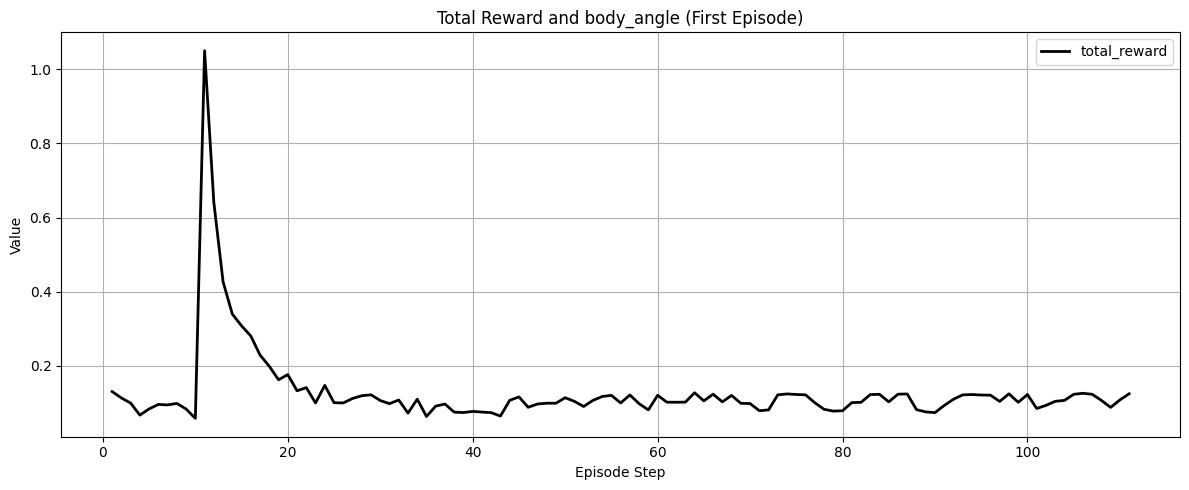

In [283]:

# === Chart 2: total_reward + body_angle ===
plt.figure(figsize=(12, 5))
if 'total_reward' in first_episode.columns:
    plt.plot(first_episode['episode_step'], first_episode['total_reward'], label='total_reward', color='black', linewidth=2)
if 'body_angle' in first_episode.columns:
    plt.plot(first_episode['episode_step'], first_episode['body_angle'], label='body_angle', linestyle='--', linewidth=2)
plt.title("Total Reward and body_angle (First Episode)")
plt.xlabel("Episode Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
